# Machine Learning Intuition for Absolute Beginners

The intention here is to provide a basic intuition of Machine Learning (ML) that is applicable to many problems. We will consider a toy dataset to create a model that will predict the weight of the person provided the age of the person. In real world, the weight depends on many other factors such as height, country in addition to age. For our model, we will just consider age as our input.

Note, the output here is a continuous variable (weight) and the ML procedure is known as 'regression'. We will use Linear Regression technique to build the model. No higher level packages.

Plan:
1. Use a Toy dataset
2. Implement the Linear regression algorithm in python
3. Introduce loss function (Mean Squared Error)
4. Introudce the training procedure (Gradient Descent)


## Toy Dataset

We will create a toy dataset with just one input (x - independent variable) and one output (y - Dependent variable)

* X is the age of the person
* y is the weight of the person

In [1]:
# This is our toy dataset. Just two python lists
X = [25, 30, 40, 20, 15, 60, 33, 52, 70]  # Age
y = [65, 70, 78, 60, 45, 70, 65, 65, 60]  # Weight in Kg

In [2]:
# Few python package imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We are creating a plot with Age along x-axis and weight on the y-axis. Every datapoint is represented by a blue dot. We see that as we age, we gain weight upto some point and then lose as we get older.

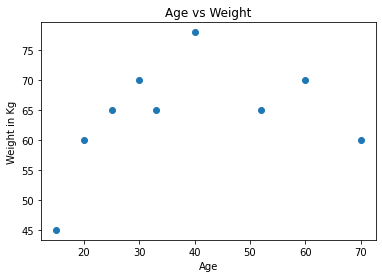

In [3]:
# Let's create a scatter plot to view the data
def draw_scatter_plot():
    plt.scatter(X, y)
    plt.title('Age vs Weight')
    plt.xlabel('Age')
    plt.ylabel('Weight in Kg')
draw_scatter_plot()

## Solutions

Now, What are our options to solve this? Remember, our problem is we want a model/technique to predict the weight given the person's age.

1. If we provide this problem to a high school student, he/she will draw a line on this plot that kind of fits the given data points well. (more on this later) based on visual cue. Once the 'best' line (what is a best line?) is drawn, we can easily find the weight for any new person provided the Age. 

Note: This is great idea for this dataset with just 1 input and 1 output. Now, what happens if we include height, nationality of the person as an additional inputs? Using visual cue doesn't help much when we have more than 3 dimensions.


2. At the same time, a student with alegbric knowledge will try to solve it using numerical methods. Again, this method is difficult to implement for a larger dataset with many inputs.

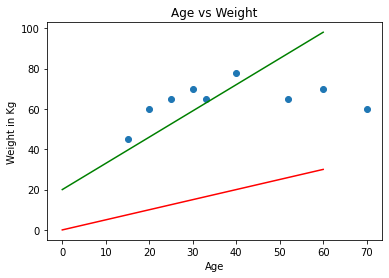

In [4]:
draw_scatter_plot()
line_x = np.linspace(0, 60, 50)
# y = w. x + b
# w = coefficient
# b = bias

# Draw green line
line_green = 1.3 * line_x + 20
plt.plot(line_x, line_green, color='green')

# Draw red line
line_red = 0.5 * line_x
plt.plot(line_x, line_red, color='red')

We are drawing a few lines randomly, In this case the green line seems to fit the datapoints better compared to red.

For a moment, let's think of this green line here as our model. We don't know if this is the 'best' model at this point. However, given a person's age, we can calculate (infer) the weight from this plot.

## We need a real approach
This is all great for simple toy datasets. We want a real approach, need an algorithm that will work well for larger datasets with many inputs.

Anyway, let's formalize this. A line can be represented by the equation 

    y = mx + c
    
For more details, refer https://en.wikipedia.org/wiki/Linear_equation

To make this simpler, we will remove the constant c and just use 

    y = w.x (w instead of m)

If you look into the problem carefully, we have a dataset that contains both 'x' and its corresponding 'y' and our job here is to find the value for 'w' that satisfies this data. That will be our model.

To find the 'w', we need,

1. Learning Procedure: We have to find a procedure to learn the 'right' value of W given a dataset.
2. Evaluation: We have to also devise a mechanism to evaluate if the final 'W' that we have arrived at is good enough for the given data and also will work well for new examples. 

Jargon: The 'x' in this dataset is called 'features' and 'y' as 'ground truth'. The 'w' is the weights of the model.

## Learning Procedure:

1. Let's assume some initial value for 'w' at random.
2. Then, let's calculate 'yhat' which is 'w.x'. We know, 'yhat' will not be same as 'y' 
3. Let's call the absolute difference between them as our error/loss. 
4. Calculate the mean loss (all examples in the data)
5. Change the 'w' and repeat the procedure (steps 2 to 4) until it converges.

Note: We can also square this error and that is called as L2 loss.

In [5]:
# Training procedure
# Assume w 
w = 1.0

# Calculate errors for each example and find the average loss.
# Loss = Mean Squared Error

errors = []
index = 1
for _x, _y in zip(X, y):
    # y = w.x
    yhat = w * _x
    # Calcuate the Squared Error term
    error = (yhat - _y) ** 2
    errors.append(error)
    print(f"Example: {index} input x: {_x} ground truth y: {_y}  yhat: {yhat}  Sq. Error: {error}")
    index += 1

print()
print(f"Final Loss (MSE) Iteration 1: {np.sum(errors)/len(y):.2f}")

Example: 1 input x: 25 ground truth y: 65  yhat: 25.0  Sq. Error: 1600.0
Example: 2 input x: 30 ground truth y: 70  yhat: 30.0  Sq. Error: 1600.0
Example: 3 input x: 40 ground truth y: 78  yhat: 40.0  Sq. Error: 1444.0
Example: 4 input x: 20 ground truth y: 60  yhat: 20.0  Sq. Error: 1600.0
Example: 5 input x: 15 ground truth y: 45  yhat: 15.0  Sq. Error: 900.0
Example: 6 input x: 60 ground truth y: 70  yhat: 60.0  Sq. Error: 100.0
Example: 7 input x: 33 ground truth y: 65  yhat: 33.0  Sq. Error: 1024.0
Example: 8 input x: 52 ground truth y: 65  yhat: 52.0  Sq. Error: 169.0
Example: 9 input x: 70 ground truth y: 60  yhat: 70.0  Sq. Error: 100.0

Final Loss (MSE) Iteration 1: 948.56


Here, we have our first iteration over all the examples in the dataset. The final average loss seems to be very high and we can definitely do better. 

Jargon: This loss is called MSE (Mean Squared Error) and it can be thought of as unhappiness of the model with the ground truth labels. If you think about it, we want to reduce this loss (unhappiness) as much as possible to get the optimal 'w' which results in a better model.

To reduce the loss, the question now is should we increase the w or reduce it? We don't know yet.

## How do we reduce Loss?
1. One method is trial and error. We can calculate the loss for different 'w' values and find the one that provides the lowest loss.

In [6]:
# This is our loss function - refactored.
def calculate_loss(w, x, y):
    errors = [(w*_x -_y)**2 for _x, _y in zip(x,y)]
    return np.mean(errors)

In [11]:
for w in [0.8, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 1.8, 2.0]:
    print(f"w: {w:.2f} \t Loss (MSE): {calculate_loss(w, X, y):.2f}")

w: 0.80 	 Loss (MSE): 1313.28
w: 1.00 	 Loss (MSE): 948.56
w: 1.10 	 Loss (MSE): 819.67
w: 1.20 	 Loss (MSE): 726.44
w: 1.30 	 Loss (MSE): 668.85
w: 1.50 	 Loss (MSE): 660.64
w: 1.60 	 Loss (MSE): 710.01
w: 1.80 	 Loss (MSE): 915.70
w: 2.00 	 Loss (MSE): 1264.00


Our least loss seems for w=~1.5. But, this method seems to be cumbersome when we have many parameters(w) in the model and time consuming. We want a better solution obviously. 

Let's use our high school calculus to come up with one.